Importing Dependancies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

Data Exploration

In [2]:
df=pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.race.value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [5]:
df=df.drop(['education','fnlwgt','relationship'],axis=1)

In [6]:
df=pd.concat([df.drop('occupation',axis=1),pd.get_dummies(df.occupation).add_prefix('occupation-')],axis=1)
df=pd.concat([df.drop('workclass',axis=1),pd.get_dummies(df.workclass).add_prefix('workclass-')],axis=1)
df=pd.concat([df.drop('marital.status',axis=1),pd.get_dummies(df['marital.status']).add_prefix('marital.status-')],axis=1)
df=pd.concat([df.drop('race',axis=1),pd.get_dummies(df.race).add_prefix('race-')],axis=1)
df=pd.concat([df.drop('native.country',axis=1),pd.get_dummies(df['native.country']).add_prefix('native.country-')],axis=1)

In [7]:
df

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,occupation-?,occupation-Adm-clerical,occupation-Armed-Forces,...,native.country-Portugal,native.country-Puerto-Rico,native.country-Scotland,native.country-South,native.country-Taiwan,native.country-Thailand,native.country-Trinadad&Tobago,native.country-United-States,native.country-Vietnam,native.country-Yugoslavia
0,90,9,Female,0,4356,40,<=50K,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,82,9,Female,0,4356,18,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,66,10,Female,0,4356,40,<=50K,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,54,4,Female,0,3900,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41,10,Female,0,3900,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,Male,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,27,12,Female,0,0,38,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,40,9,Male,0,0,40,>50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,58,9,Female,0,0,40,<=50K,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [8]:
le=LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])

Income :
">50k ----->1"
"<=50k ---->0"

Gender
Male ----->1
Female --->0

In [9]:
df

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,occupation-?,occupation-Adm-clerical,occupation-Armed-Forces,...,native.country-Portugal,native.country-Puerto-Rico,native.country-Scotland,native.country-South,native.country-Taiwan,native.country-Thailand,native.country-Trinadad&Tobago,native.country-United-States,native.country-Vietnam,native.country-Yugoslavia
0,90,9,0,0,4356,40,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,82,9,0,0,4356,18,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,66,10,0,0,4356,40,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,54,4,0,0,3900,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41,10,0,0,3900,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,27,12,0,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,40,9,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,58,9,0,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 85 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        32561 non-null  int64
 1   education.num                              32561 non-null  int64
 2   sex                                        32561 non-null  int64
 3   capital.gain                               32561 non-null  int64
 4   capital.loss                               32561 non-null  int64
 5   hours.per.week                             32561 non-null  int64
 6   income                                     32561 non-null  int64
 7   occupation-?                               32561 non-null  bool 
 8   occupation-Adm-clerical                    32561 non-null  bool 
 9   occupation-Armed-Forces                    32561 non-null  bool 
 10  occupation-Craft-repair                    325

In [11]:
categorical_cols = df.select_dtypes(include=['bool']).columns

In [12]:
df[categorical_cols] = df[categorical_cols].astype(int)


In [13]:
df

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,occupation-?,occupation-Adm-clerical,occupation-Armed-Forces,...,native.country-Portugal,native.country-Puerto-Rico,native.country-Scotland,native.country-South,native.country-Taiwan,native.country-Thailand,native.country-Trinadad&Tobago,native.country-United-States,native.country-Vietnam,native.country-Yugoslavia
0,90,9,0,0,4356,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,9,0,0,4356,18,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,10,0,0,4356,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,4,0,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,10,0,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,27,12,0,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,40,9,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,58,9,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
df.columns

Index(['age', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'occupation-?', 'occupation-Adm-clerical',
       'occupation-Armed-Forces', 'occupation-Craft-repair',
       'occupation-Exec-managerial', 'occupation-Farming-fishing',
       'occupation-Handlers-cleaners', 'occupation-Machine-op-inspct',
       'occupation-Other-service', 'occupation-Priv-house-serv',
       'occupation-Prof-specialty', 'occupation-Protective-serv',
       'occupation-Sales', 'occupation-Tech-support',
       'occupation-Transport-moving', 'workclass-?', 'workclass-Federal-gov',
       'workclass-Local-gov', 'workclass-Never-worked', 'workclass-Private',
       'workclass-Self-emp-inc', 'workclass-Self-emp-not-inc',
       'workclass-State-gov', 'workclass-Without-pay',
       'marital.status-Divorced', 'marital.status-Married-AF-spouse',
       'marital.status-Married-civ-spouse',
       'marital.status-Married-spouse-absent', 'marital.status-Never-married',
  

Data Visualization

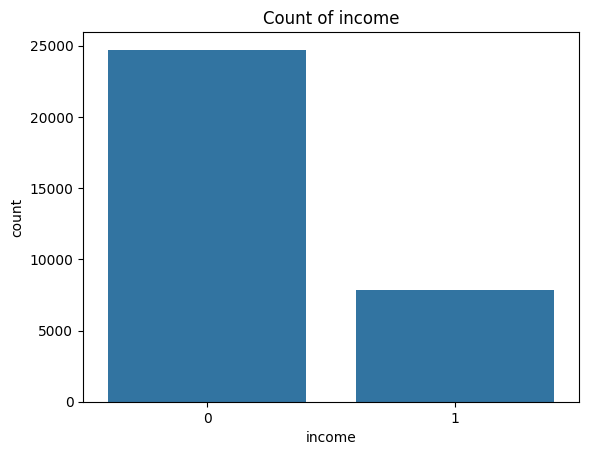

In [15]:
sns.countplot(x='income', data=df)
plt.title('Count of income')
plt.show()

In [16]:
corr=df.corr()['income'].abs()
sorted_corr = corr.sort_values()
Ndrop=int(0.75*len(df.columns))
drop=sorted_corr.iloc[:Ndrop].index
Newdf=df.drop(drop,axis=1)

In [17]:
Newdf

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,occupation-?,occupation-Adm-clerical,occupation-Exec-managerial,...,occupation-Prof-specialty,workclass-?,workclass-Private,workclass-Self-emp-inc,marital.status-Divorced,marital.status-Married-civ-spouse,marital.status-Never-married,marital.status-Separated,race-Black,race-White
0,90,9,0,0,4356,40,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,82,9,0,0,4356,18,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,66,10,0,0,4356,40,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,54,4,0,0,3900,40,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,41,10,0,0,3900,40,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,1,0,0,40,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
32557,27,12,0,0,0,38,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
32558,40,9,1,0,0,40,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
32559,58,9,0,0,0,40,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


<Axes: >

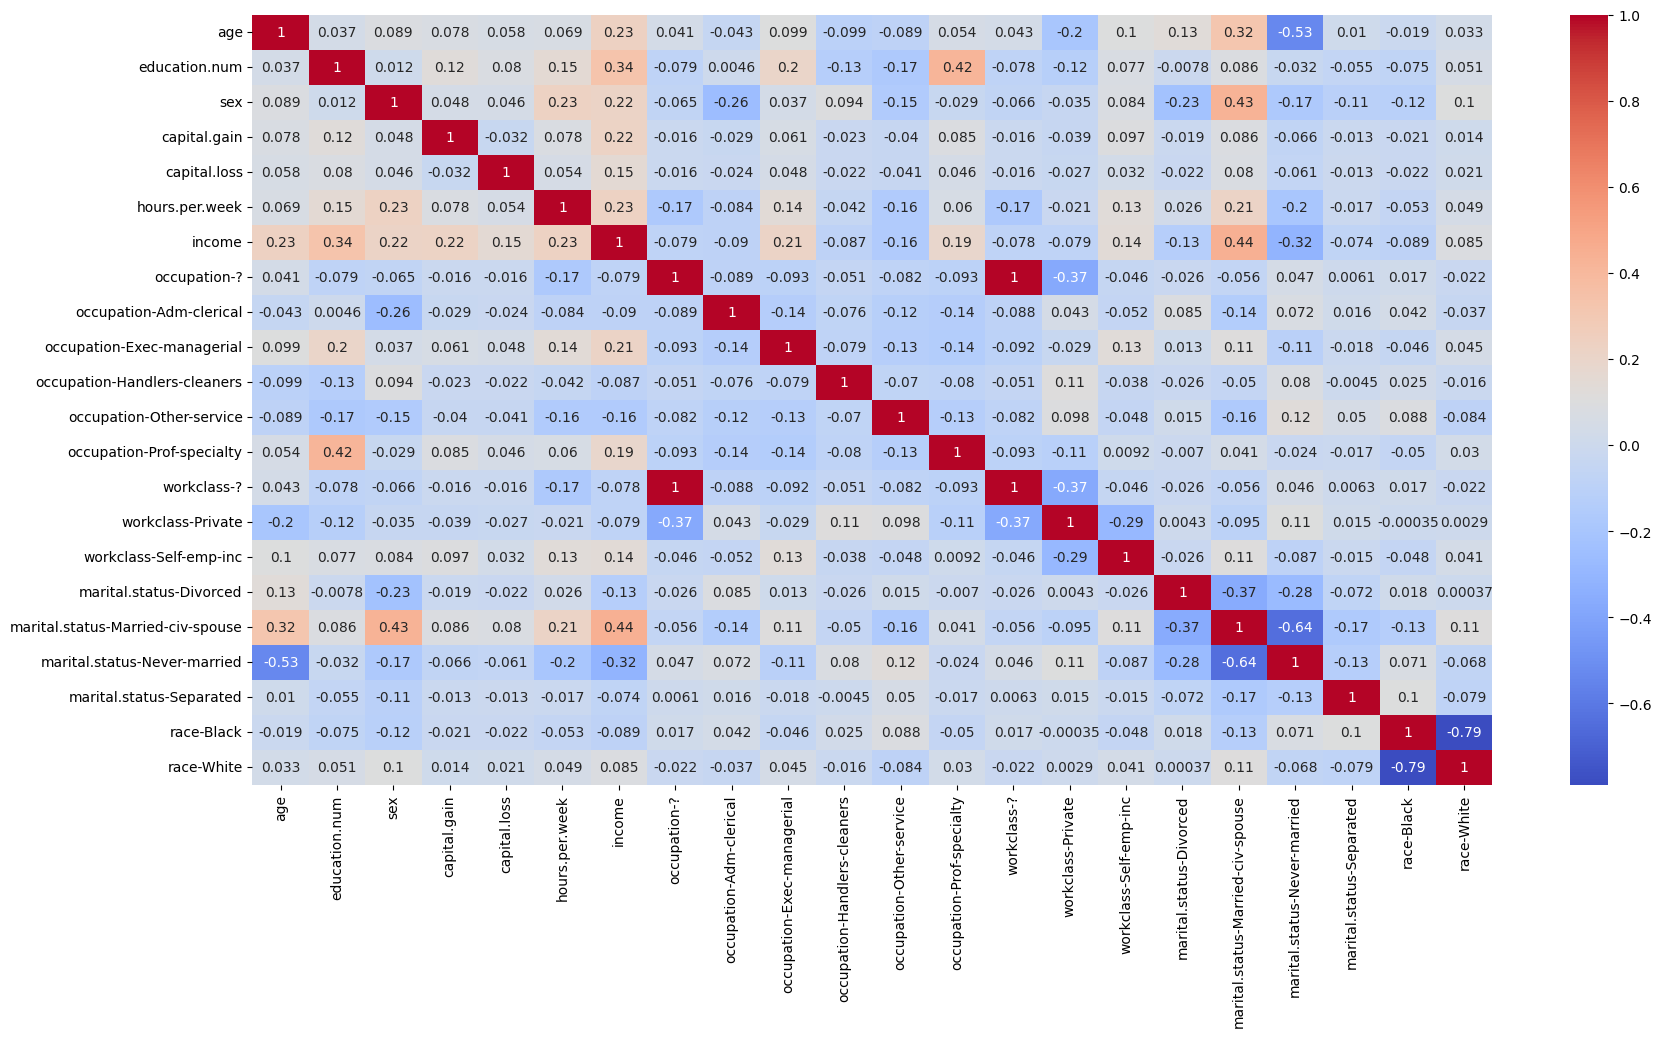

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(Newdf.corr(), annot=True,cmap='coolwarm')

data training KNN

In [19]:
X = df.drop('income', axis=1)
y = df['income']

In [20]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2,random_state=312)

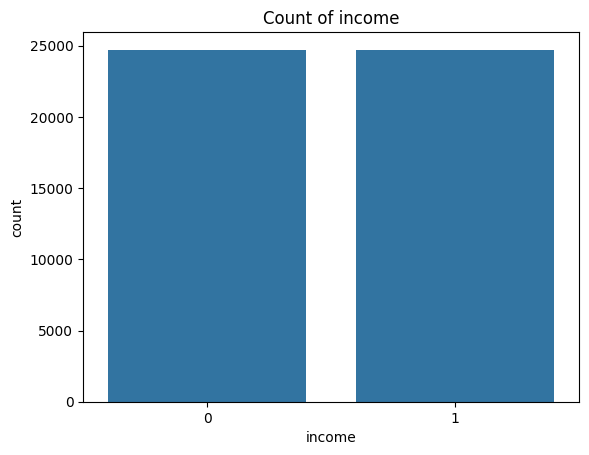

In [22]:
sns.countplot(x=y_sm, data=df)
plt.title('Count of income')
plt.show()

In [23]:
param_grid = {
    'n_neighbors': np.arange(3,12),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [24]:
knn = KNeighborsClassifier()

In [25]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [26]:
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

best_params, best_accuracy

In [ ]:
knn=grid_search.best_estimator_

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
knn.score(X_test,y_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['>50k', '<=50k'], yticklabels=['>50k', '<=50k'])
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

data training DecisionTree 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2022)

In [ ]:
TGrid={
    'max_depth' : [3,6,None],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,3,5],
    'max_features':[3,9,None],
    'max_leaf_nodes':[1,2,None],
    'ccp_alpha':[0.001,0.01,0.1],
    }


In [ ]:
dtc=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=TGrid , verbose=10)

In [ ]:
dtc.fit(X_train,y_train)

In [ ]:
dtc=dtc.best_estimator_

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
dtc.score(X_test,y_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['>50k', '<=50k'], yticklabels=['>50k', '<=50k'])
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

data training Random forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2022)

In [20]:
Grid={
    'max_depth' : [3,6,None],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,3,5],
    'max_features':[3,9,None],
    'max_leaf_nodes':[1,2,None],
    'ccp_alpha':[0.001,0.01,0.1],
    }

model=GridSearchCV(estimator=RandomForestClassifier(),param_grid=Grid , verbose=10)

In [ ]:
model=model.fit(X_train,y_train)

In [ ]:
model=model.best_estimator_

In [23]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['>50k', '<=50k'], yticklabels=['>50k', '<=50k'])
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))